In [46]:
import subprocess

type = 'Edges'
if type == "Adj":
    Heading = "Adjacency List"
else:
    Heading = "Edge List"

filename = 'Sequential-Boruvka-' + type
cpp_filename = filename + '.cpp'
executable_filename = filename + '.o'
results_filename = filename + '.results'

# Compile the C++ file
compile_command = f"g++ -std=c++17 -o {executable_filename} {cpp_filename}"
try:
    subprocess.run(compile_command, shell=True, check=True)
    print("Compilation successful!")
except subprocess.CalledProcessError as e:
    print(f"Compilation failed with error: {e}")
    exit(1)


Compilation successful!


In [47]:
# Define the inputs and thread counts
input_values = [1000, 2000, 3000, 4000, 5000]

# Create or clear the results file
with open(results_filename, 'w') as file:
    file.write("")

# Run the tests
for input_size in input_values:
    print(f"Running for input {input_size}...")

    # Write the header for this input
    with open(results_filename, 'a') as file:
        file.write(f"Input: {input_size}\n")

    # Initialize sum for milliseconds
    total_ms = 0

    # Run 5 times
    for run in range(1, 6):
        print(f"  Run {run}...")

        # Run the program and capture the output
        result = subprocess.run(
            ['./' + executable_filename, str(input_size), str(1)],  # Use the variable here
            capture_output=True, text=True
        )

        output = result.stdout
        # Extract the last two lines
        last_two_lines = "\n".join(output.splitlines()[-2:])

        # Write the run output to file
        with open(results_filename, 'a') as file:
            file.write(f"Run {run}:\n")
            file.write(f"{last_two_lines}\n")

        # Extract milliseconds value
        ms_line = [line for line in last_two_lines.splitlines() if 'milliseconds' in line][0]
        ms = float(ms_line.split()[5])

        # Accumulate the sum of milliseconds
        total_ms += ms

    # Calculate the average time in milliseconds
    avg_ms = total_ms / 5

    # Write averages to file
    with open(results_filename, 'a') as file:
        file.write(f"Average Time to build MST: {avg_ms:.5f} milliseconds\n")
        file.write("-----------------------------------\n")

print(f"All runs complete. Results saved to {results_filename}.")


Running for input 1000...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running for input 2000...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running for input 3000...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running for input 4000...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running for input 5000...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
All runs complete. Results saved to Sequential-Boruvka-Edges.results.


In [48]:
import matplotlib.pyplot as plt

# Define the input sizes and thread counts
input_sizes = [1000, 2000, 3000, 4000, 5000]

# Initialize a dictionary to store average times in milliseconds
avg_times_ms = {input_size: 0 for input_size in input_sizes}

# Read the results.txt file
with open(results_filename, 'r') as file:
    lines = file.readlines()

current_input = None

# Parse the file
for line in lines:
    line = line.strip()

    # Detect the input size
    if line.startswith('Input:'):
        current_input = int(line.split(':')[1].strip())

    # Extract the average time for MST in milliseconds
    if line.startswith('Average Time to build MST:') and 'milliseconds' in line:
        avg_ms = float(line.split(':')[1].split()[0])

        # Store the average time for the input size
        avg_times_ms[current_input] = avg_ms
        print(f"Input: {current_input}, Avg Time: {avg_ms:.5f} ms")

print("Average times in milliseconds:")
for input_size, avg_time in avg_times_ms.items():
    print(f"Input Size: {input_size}, Average Time: {avg_time:.5f} ms")


Input: 1000, Avg Time: 3.04562 ms
Input: 2000, Avg Time: 4.60305 ms
Input: 3000, Avg Time: 6.83262 ms
Input: 4000, Avg Time: 9.17070 ms
Input: 5000, Avg Time: 11.25998 ms
Average times in milliseconds:
Input Size: 1000, Average Time: 3.04562 ms
Input Size: 2000, Average Time: 4.60305 ms
Input Size: 3000, Average Time: 6.83262 ms
Input Size: 4000, Average Time: 9.17070 ms
Input Size: 5000, Average Time: 11.25998 ms


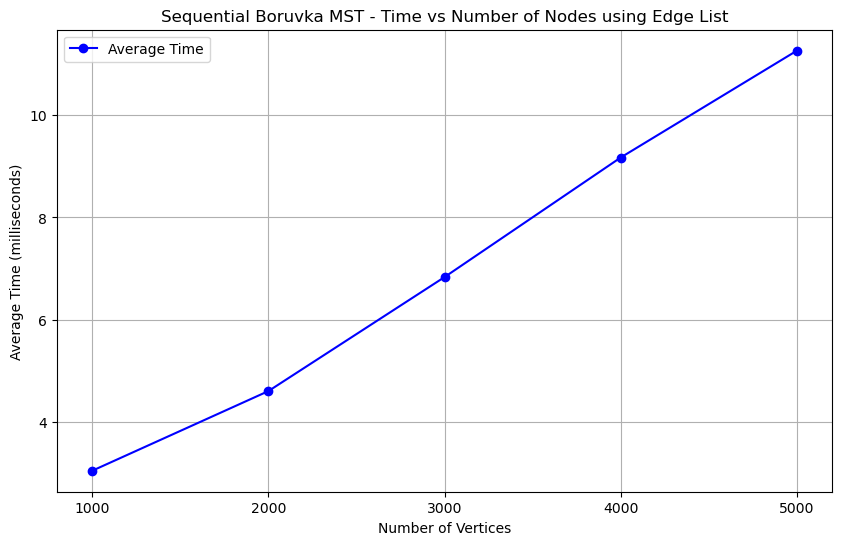

In [49]:
# Now plot the graph
plt.figure(figsize=(10, 6))

# Plot the graph for input sizes and their corresponding average times
plt.plot(input_sizes, list(avg_times_ms.values()), marker='o', color='blue', label='Average Time')

plt.xlabel('Number of Vertices')
plt.ylabel('Average Time (milliseconds)')
plt.title(f'Sequential Boruvka MST - Time vs Number of Nodes using {Heading}')
plt.legend()
plt.grid(True)
plt.xticks(input_sizes)

# Show the plot
plt.show()

In [50]:
import os

os.remove(executable_filename)
os.remove(results_filename)
print(f"Cleaned up: Removed {executable_filename} and {results_filename}.")


Cleaned up: Removed Sequential-Boruvka-Edges.o and Sequential-Boruvka-Edges.results.
